In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

Сгенерируем выборку из распределения Коши с нулевым параметром сдвига и с параметром масштаба, равным единице. Размер выборки по условию равен 100:

In [2]:
cauchy_sample = sps.cauchy.rvs(size=100)

Предположим, что у нас выборка с распределением $N \sim (\theta, 1)$. Найдем априорное распределение. Воспользуемся "правилом двух сигм". Взяв матожидание $\theta$ равным 0, получим: $P(0 - 2\sigma \le \theta \le 0 + 2\sigma) \ge 0.95$. Но по условию $P(|\theta| < 0.5) \ge 0.95$, откуда $\sigma = \frac{1}{4}$. То есть получаем, что $\theta \sim N(0,\frac{1}{16})$. Теперь посчитаем байесовскую оценку $\hat{\theta}$. Аналогично №7.1 имеем, что $\hat{\theta} = E(\theta|X) = \mu = \frac{\frac{\mu_0}{\sigma_0^2} + \frac{\sum_{i=1}^n X_i}{\sigma^2}}{\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}}$. В нашем случае $\mu_0 = 0, \sigma_0 = \frac{1}{4}$, поэтому $\hat{\theta} = \frac{\sum_{i=1}^n X_i}{16 + n}$. ОМП для $N \sim (1, \theta)$ как мы знаем, является $\bar{X}$. Теперь зададим функцию, которая считает и строит графики оценок: байесовской и оценки по методу максимального правдоподобия(строим графики абсолютной величины отклонения этих оценок от истинного значения параметра $\theta_0 = 0$ в зависимости от n):

In [7]:
def draw_evaluations(sample):
    cumulative_sums = np.cumsum(sample)
    mean_values = cumulative_sums
    for i in range(len(mean_values)):
        mean_values[i] = abs(mean_values[i] / float(i + 1))
    bayesian_eval_values = [np.abs(cumulative_sums[i] / float(i + 1. + 16.)) for i in range(len(sample))]
    points = range(1, len(sample) + 1)
    plt.plot(points,mean_values,label='MLE')
    plt.title('MLE evaluation for $\\theta$')
    plt.show()
    plt.plot(points,bayesian_eval_values,label='Bayes')
    plt.title('Bayesian evaluation for $\\theta$')
    plt.show()

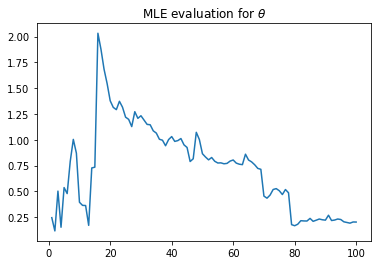

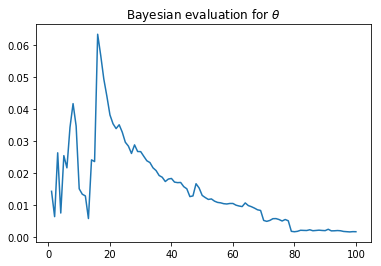

In [8]:
draw_evaluations(cauchy_sample)

По построенным графикам можем видеть, что байесовская оценка оказалась куда лучше, чем оценка по методу максимального правдоподобия.